## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## Load Data

In [2]:
df=pd.read_excel('superstore_sales.xlsx')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


## Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
df.shape

(51290, 21)

In [7]:
df.size

1077090

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

## Data Preprocessing

In [9]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Feature Separation
numerical_cols=df.select_dtypes(include=['float64','int64']).columns
categorical_cols=df.select_dtypes(include=['object']).columns

In [12]:
numerical_cols

Index(['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'year'], dtype='object')

In [13]:
categorical_cols

Index(['order_id', 'ship_mode', 'customer_name', 'segment', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'order_priority'],
      dtype='object')

In [14]:
df.drop(columns=['customer_name', 'order_id', 'product_id'],inplace=True)

In [15]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [16]:
df['category'].value_counts()

category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [17]:
df['sub_category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [18]:
df['sub_category'].value_counts()

sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [19]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [20]:
df['segment'].value_counts()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [21]:
df['region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [22]:
df['region'].value_counts()

region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

In [23]:
df['order_priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [24]:
df['order_priority'].value_counts()

order_priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

In [25]:
df['product_name'].unique()

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Panasonic Business\xa0Telephones\xa0KX-T7736',
       'Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order',
       'Acco Glide Clips'], dtype=object)

In [26]:
df['product_name'].value_counts()

product_name
Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Xerox Blank Computer Paper                                                     1
Panasonic KX MB2061 Multifunction Printer                                      1
Grip Seal Envelopes                                                            1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Acco Glide Clips                                                               1
Name: count, Length: 3788, dtype: int64

In [27]:
df['ship_mode'].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [28]:
df['ship_mode'].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [29]:
df['state'].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Karaman',
       'Sikasso', 'Atsimo-Andrefana'], dtype=object)

In [30]:
df['state'].value_counts()

state
California          2001
England             1499
New York            1128
Texas                985
Ile-de-France        981
                    ... 
Rize                   1
Meta                   1
Ar Raqqah              1
Pernik                 1
Atsimo-Andrefana       1
Name: count, Length: 1094, dtype: int64

In [31]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [32]:
df['country'].value_counts()

country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Burundi             2
Chad                2
Eritrea             2
Bahrain             2
South Sudan         2
Name: count, Length: 147, dtype: int64

In [33]:
df['market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [34]:
df['market'].value_counts()

market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

In [35]:
df[numerical_cols].describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


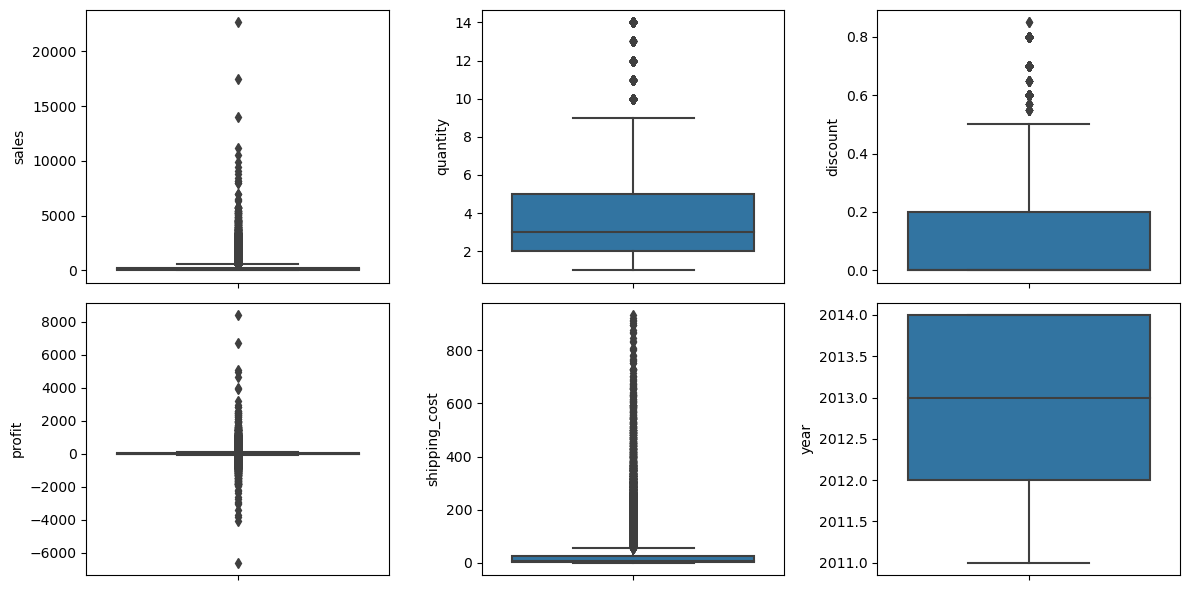

In [36]:
# Step 5: Outlier Detection and Treatment
# Boxplot for visual inspection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2, i + 1)
    sns.boxplot(data=df, y=col)
plt.tight_layout()
plt.show()

In [37]:
import numpy as np

def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Option 1: Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Option 2: Cap outliers
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    
    return df

# Apply the function to the columns of interest
for col in ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']:
    df = treat_outliers_iqr(df, col)

# Check the updated DataFrame
print(df.describe())


                          order_date                      ship_date  \
count                          30879                          30879   
mean   2013-05-11 23:45:35.412416256  2013-05-16 01:08:16.298455296   
min              2011-01-01 00:00:00            2011-01-03 00:00:00   
25%              2012-06-19 00:00:00            2012-06-24 00:00:00   
50%              2013-07-09 00:00:00            2013-07-12 00:00:00   
75%              2014-05-22 00:00:00            2014-05-26 00:00:00   
max              2014-12-31 00:00:00            2015-01-07 00:00:00   
std                              NaN                            NaN   

              sales      quantity      discount        profit  shipping_cost  \
count  30879.000000  30879.000000  30879.000000  30879.000000   30879.000000   
mean      72.592784      2.849704      0.090738     11.282549       6.524297   
min        0.990000      1.000000      0.000000    -38.220000       0.002000   
25%       23.520000      2.000000      0

In [38]:
df[numerical_cols].describe()

,sales,quantity,discount,profit,shipping_cost,year
count,30879.000000,30879.000000,30879.000000,30879.000000,30879.000000,30879.000000
mean,72.592784,2.849704,0.090738,11.282549,6.524297,2012.777098
std,72.288147,1.600585,0.148741,17.415512,6.073731,1.098179
min,0.990000,1.000000,0.000000,-38.220000,0.002000,2011.000000
25%,23.520000,2.000000,0.000000,1.860000,1.910000,2012.000000
50%,48.660000,2.000000,0.000000,7.540000,4.383000,2013.000000
75%,97.680000,4.000000,0.185000,18.893850,9.310000,2014.000000
max,575.880000,7.000000,0.500000,68.280000,26.420000,2014.000000


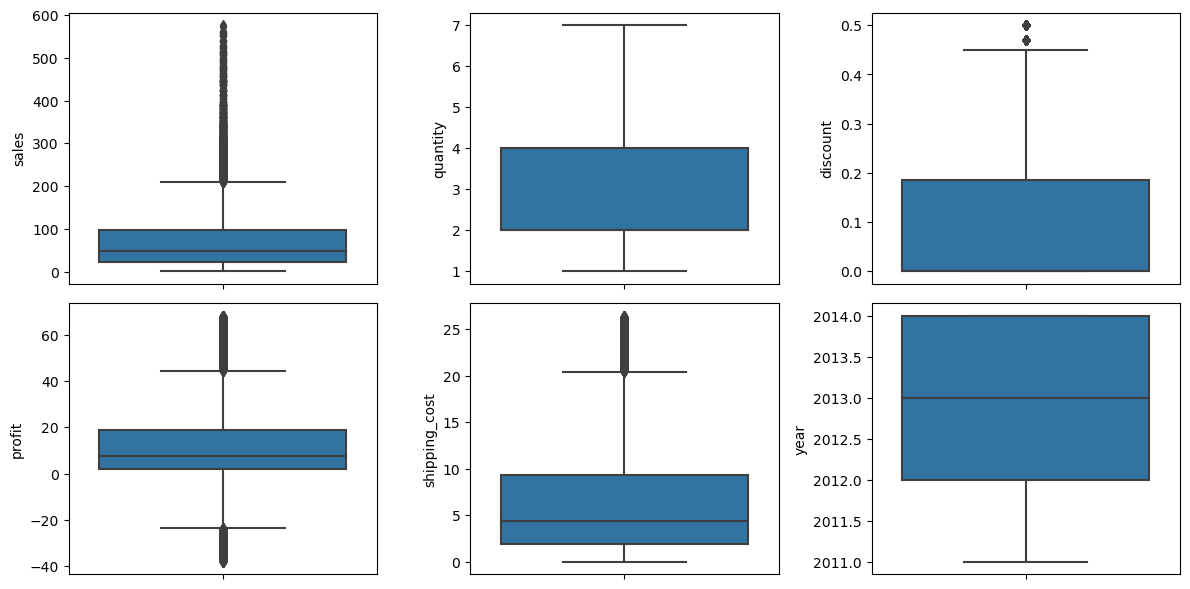

In [39]:
# Step 5: Outlier Detection and Treatment
# Boxplot for visual inspection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2, i + 1)
    sns.boxplot(data=df, y=col)
plt.tight_layout()
plt.show()

In [40]:
df[numerical_cols].skew()

sales            2.179652
quantity         0.847992
discount         1.525753
profit           0.667032
shipping_cost    1.301028
year            -0.343176
dtype: float64

In [41]:
from scipy import stats
df['sales'],a=stats.boxcox(df['sales'])

In [45]:
df['shipping_cost'],b=stats.boxcox(df['shipping_cost'])

In [51]:
df['discount'] = df['discount'] + 1  # Adjust as necessary
df['discount'],c = stats.boxcox(df['discount'])

In [52]:
df[numerical_cols].skew()

sales           -0.011857
quantity         0.847992
discount         0.753123
profit           0.667032
shipping_cost   -0.044108
year            -0.343176
dtype: float64

## Sales Analysis
**Calculate total sales and analyze sales by category.**

**Identify the top products by sales.**

In [54]:
# Total sales
total_sales = df['sales'].sum()
print(f'Total Sales: {total_sales}')

Total Sales: 141403.4751941205


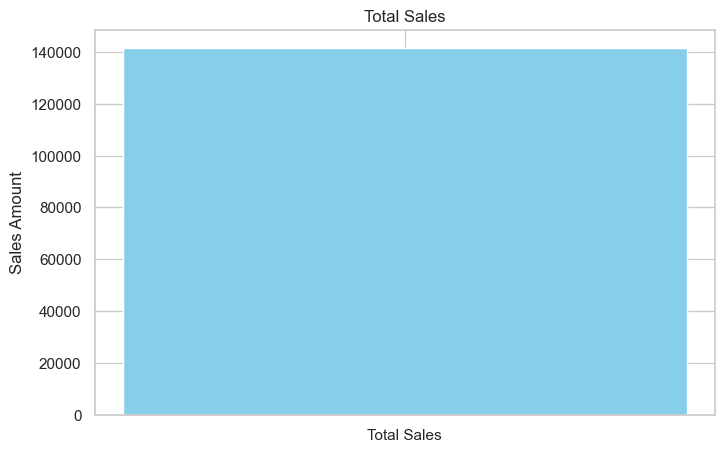

In [77]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot for Total Sales
plt.figure(figsize=(8, 5))
plt.bar(x=['Total Sales'], height=[total_sales], color='skyblue')
plt.title('Total Sales')
plt.ylabel('Sales Amount')
plt.show()

**The above plot shows the total sales value, which stands at 141,403.48.**

**This amount visually represented by the height of the bar chart, highlights the overall sales generated.**

**The visualization provides a clear indication of the total sales figure, allowing for a quick and effective understanding of sales performance at a glance.**

In [55]:
# Sales by category
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)
print("Sales by Category:")
print(sales_by_category)

Sales by Category:
category
Office Supplies    98590.216252
Furniture          21693.165816
Technology         21120.093126
Name: sales, dtype: float64


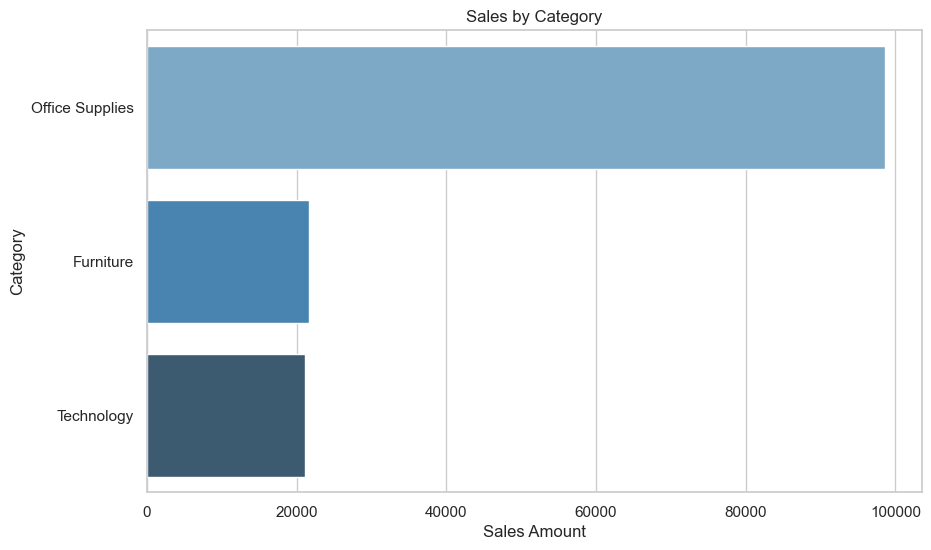

In [78]:
#  Plot for Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category.reset_index(), x='sales', y='category', palette='Blues_d')
plt.title('Sales by Category')
plt.xlabel('Sales Amount')
plt.ylabel('Category')
plt.show()

**The plot illustrates the distribution of total sales across three primary categories: Office Supplies, Furniture, and Technology.**

**The 'Office Supplies' category leads with the highest sales at 98,590.22, followed by 'Furniture' at 21,693.17, and 'Technology' at 21,120.09.**

**This breakdown helps highlight which category contributes the most to overall sales, with Office Supplies accounting for a significant majority.**

**The visualization enables easy comparison among categories, providing insights into areas of strong performance and potential growth.**

In [56]:
# Top 10 products by sales
top_products = df.groupby('product_name', as_index=False)['sales'].sum().sort_values(by='sales', ascending=False).head(10)
print("Top 10 Products by Sales:")
print(top_products)

Top 10 Products by Sales:
                               product_name       sales
2807                                Staples  659.963475
2622  Sanford Pencil Sharpener, Water Color  312.916717
2798  Stanley Pencil Sharpener, Water Color  290.258549
783               Cardinal Index Tab, Clear  253.449649
1676                 Ibico Index Tab, Clear  241.324351
3033     Wilson Jones 3-Hole Punch, Durable  232.486049
2859  Stockwell Paper Clips, Assorted Sizes  223.183842
627    Boston Pencil Sharpener, Water Color  214.344914
79                    Acco Index Tab, Clear  205.496420
1266             Fellowes Trays, Wire Frame  196.702881


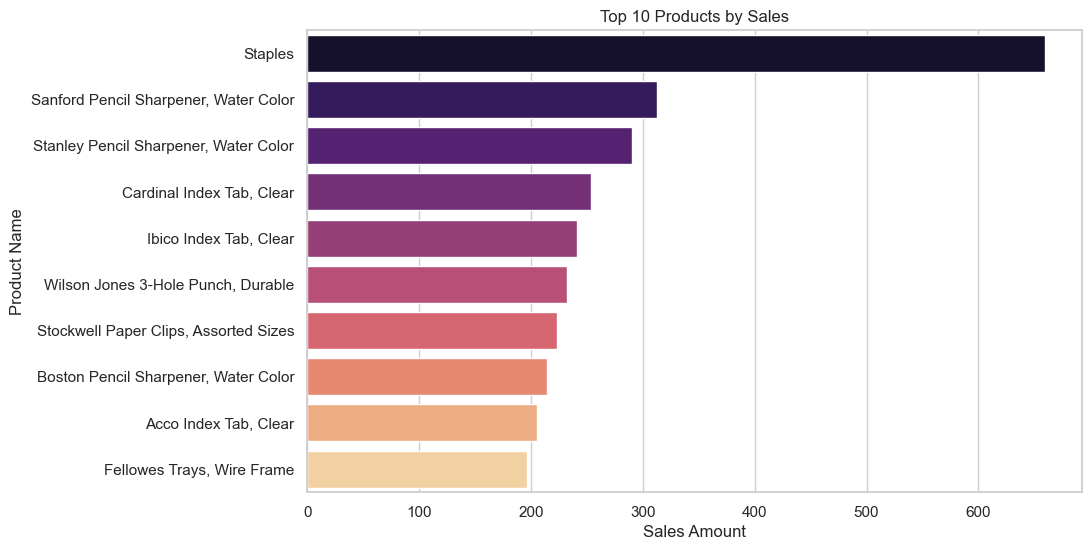

In [79]:
# Plot for Top 10 Products by Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='sales', y='product_name', palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Product Name')
plt.show()

**The plot displays the top 10 products based on sales, led by 'Staples' with a sales total of 659.96.**

**Other top products include 'Sanford Pencil Sharpener, Water Color' (312.92) and 'Stanley Pencil Sharpener, Water Color' (290.26). Products like 'Cardinal Index Tab, Clear' and 'Ibico Index Tab, Clear' also show strong sales figures, along with various office supplies such as 'Wilson Jones 3-Hole Punch, Durable' and 'Stockwell Paper Clips, Assorted Sizes.'**

**This ranking highlights the best-performing items in terms of sales, allowing for quick identification of high-demand products.**

**The visualization serves as an effective tool for understanding which products drive the most revenue.**

##  Customer Segmentation

**Analyze sales by customer segment.**

**Plotting total sales by customer segment.**

In [60]:
# Sales by customer segment
sales_by_segment = df.groupby('segment')['sales'].sum().sort_values(ascending=False).reset_index()
print("Sales by Segment:")
print(sales_by_segment)

Sales by Segment:
       segment         sales
0     Consumer  73150.109897
1    Corporate  42657.869067
2  Home Office  25595.496230


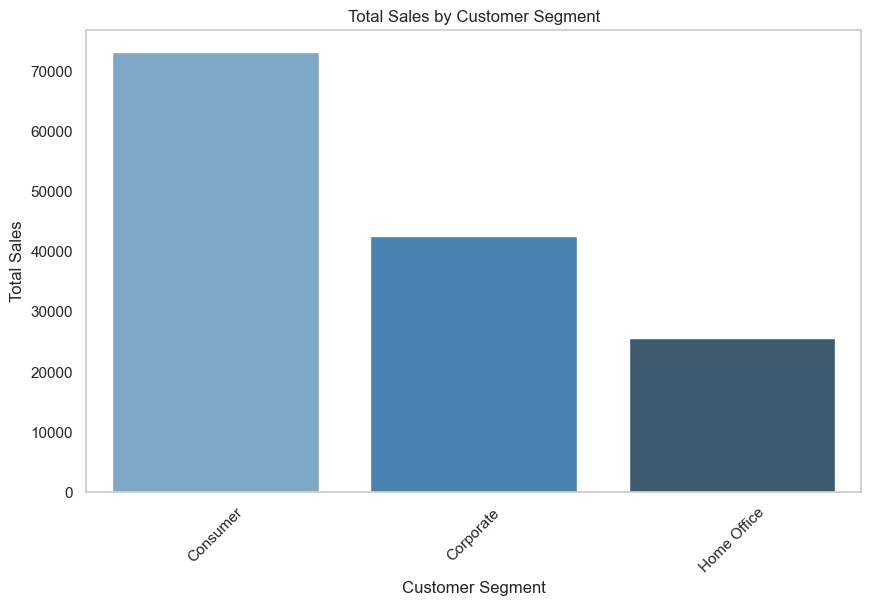

In [61]:
# Plotting Sales by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_segment, x='segment', y='sales', palette='Blues_d')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**The plot presents the breakdown of sales across different customer segments.**

**The 'Consumer' segment leads with the highest sales, amounting to 73,150.11, followed by the 'Corporate' segment with 42,657.87, and finally, the 'Home Office' segment with 25,595.50.**

**This distribution indicates that the Consumer segment is the largest contributor to total sales, while the Home Office segment generates the lowest.**

**This visualization enables a clear comparison across segments, helping to identify where the majority of sales revenue originates and highlighting potential areas for targeted sales strategies**

##  Temporal Analysis
**Convert order_date to datetime and analyze sales over time.**

In [62]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [63]:
# Group by month-year
df['month_year'] = df['order_date'].dt.to_period('M')
sales_over_time = df.groupby('month_year')['sales'].sum().reset_index()

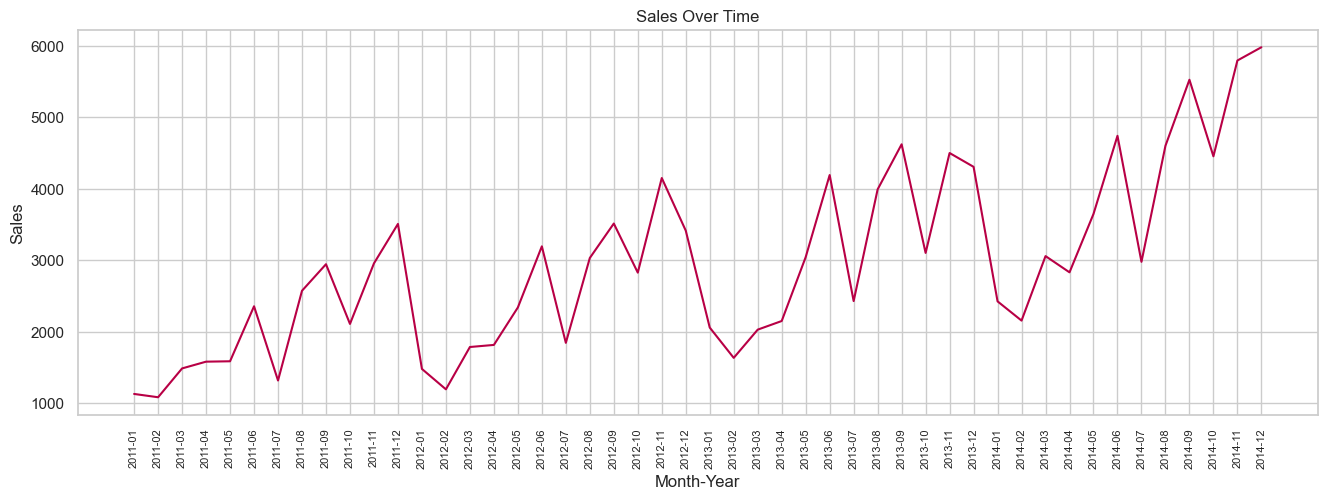

In [64]:
# Plotting Sales Over Time
plt.figure(figsize=(16, 5))
plt.plot(sales_over_time['month_year'].astype(str), sales_over_time['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.title('Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.show()

**The line plot illustrates sales trends over time, with the x-axis representing the month and year, and the y-axis showing the corresponding sales figures.**

## Profit Analysis
**Analyze total profit and profit by category.**

In [65]:
# Total profit
total_profit = df['profit'].sum()
print(f'Total Profit: {total_profit}')

Total Profit: 348393.82548


In [66]:
# Profit by category
profit_by_category = df.groupby('category')['profit'].sum().sort_values(ascending=False).reset_index()
print("Profit by Category:")
print(profit_by_category)

Profit by Category:
          category        profit
0  Office Supplies  231353.90710
1       Technology   63116.99958
2        Furniture   53922.91880


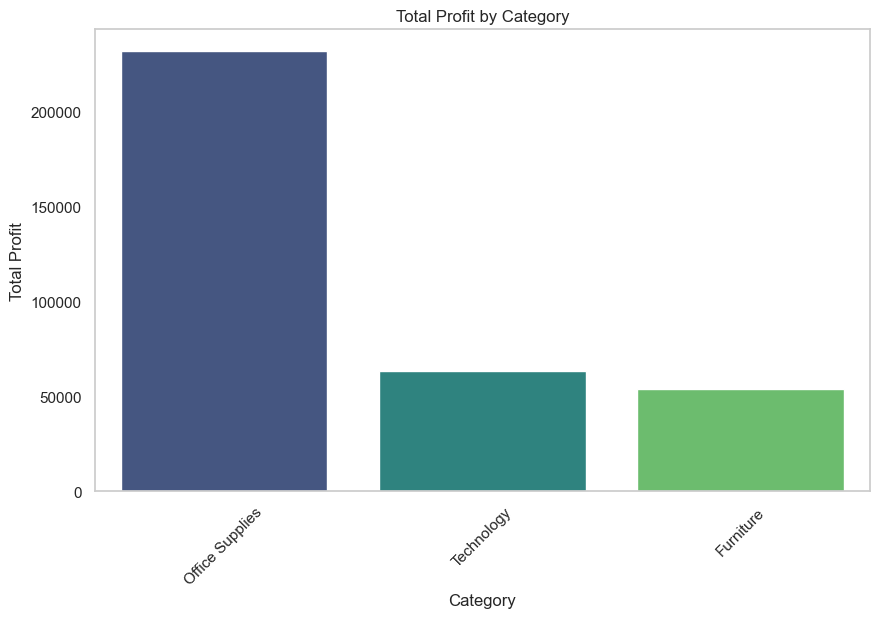

In [67]:
# Plotting Total Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_by_category, x='category', y='profit', palette='viridis')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**The plot shows the profit distribution across three key categories: Office Supplies, Technology, and Furniture. 'Office Supplies' is the most profitable category, with a total profit of 231,353.91, significantly outpacing the other categories.**

**'Technology' follows with a profit of 63,117.00, while 'Furniture' contributes 53,922.92 in profit.**

**This breakdown highlights that Office Supplies not only drive substantial sales but also generate the highest profit, suggesting that it is a core area of profitability.**

**This visualization effectively illustrates profit margins by category, enabling focused analysis for business strategy**

##  Discount Analysis
**Analyze average discount by category.**

In [68]:
# Average discount by category
avg_discount_by_category = df.groupby('category')['discount'].mean().reset_index()
print("Average Discount by Category:")
print(avg_discount_by_category)

Average Discount by Category:
          category  discount
0        Furniture  0.037187
1  Office Supplies  0.024874
2       Technology  0.031625


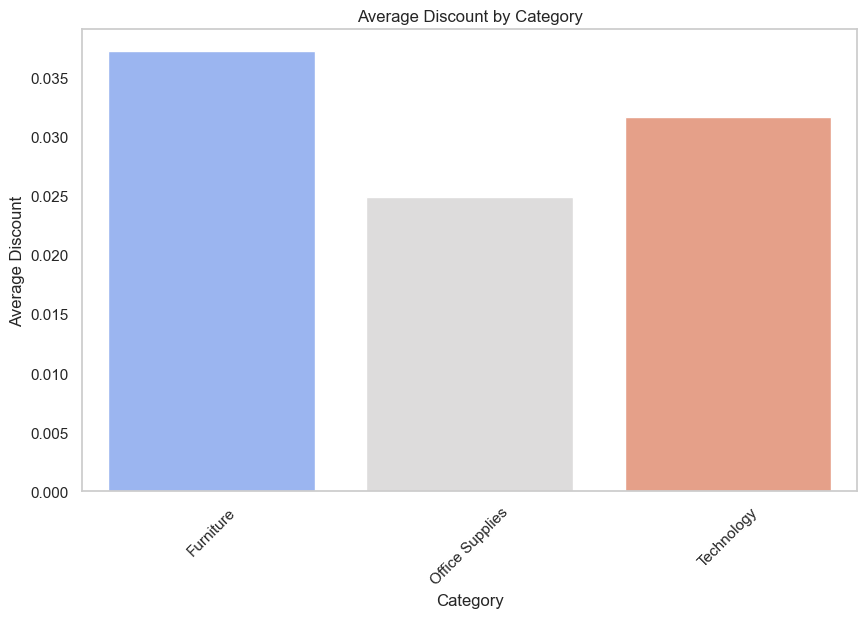

In [69]:
# Plotting Average Discount by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_discount_by_category, x='category', y='discount', palette='coolwarm')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**The plot illustrates the average discount applied across three main categories: Furniture, Office Supplies, and Technology.**

**'Furniture' has the highest average discount at 3.72%, followed by 'Technology' with a 3.16% discount, and 'Office Supplies' with the lowest average discount of 2.49%.**

**This information provides insight into the discounting strategies for each category, with Furniture receiving the most frequent or largest discounts, which could be a tactic to boost sales in that category.**

**The visualization aids in understanding pricing strategies and their variation across categories**

## Shipping Cost Analysis
**Analyze total and category-wise shipping costs.**

In [70]:
# Total shipping cost
total_shipping_cost = df['shipping_cost'].sum()
print(f'Total Shipping Cost: {total_shipping_cost}')

Total Shipping Cost: 53685.508961100306


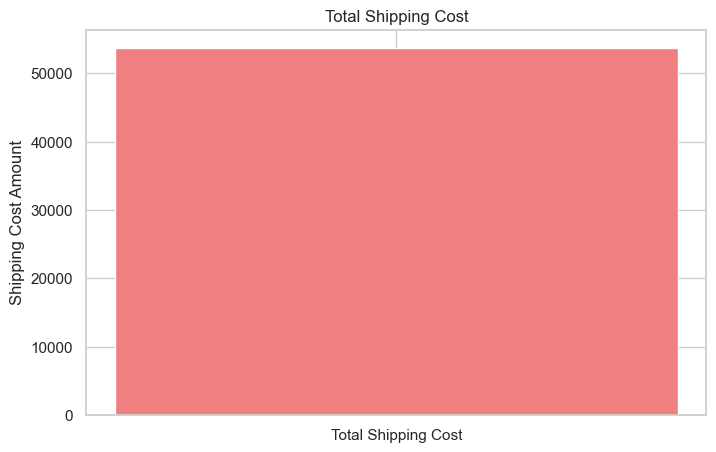

In [72]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Plot for Total Shipping Cost
plt.figure(figsize=(8, 5))
plt.bar(x=['Total Shipping Cost'], height=[total_shipping_cost], color='lightcoral')
plt.title('Total Shipping Cost')
plt.ylabel('Shipping Cost Amount')
plt.show()


**The plot displays the total shipping cost, amounting to 53,685.51.**

**This value represents the cumulative cost associated with shipping across all categories or segments.**

**The visualization highlights the overall expense dedicated to logistics, helping to contextualize it within the broader cost structure and allowing for an understanding of its impact on total expenses.**

In [71]:
# Shipping cost by category
shipping_cost_by_category = df.groupby('category')['shipping_cost'].sum().sort_values(ascending=False)
print("Shipping Cost by Category:")
print(shipping_cost_by_category)

Shipping Cost by Category:
category
Office Supplies    34136.889318
Technology          9868.025991
Furniture           9680.593652
Name: shipping_cost, dtype: float64


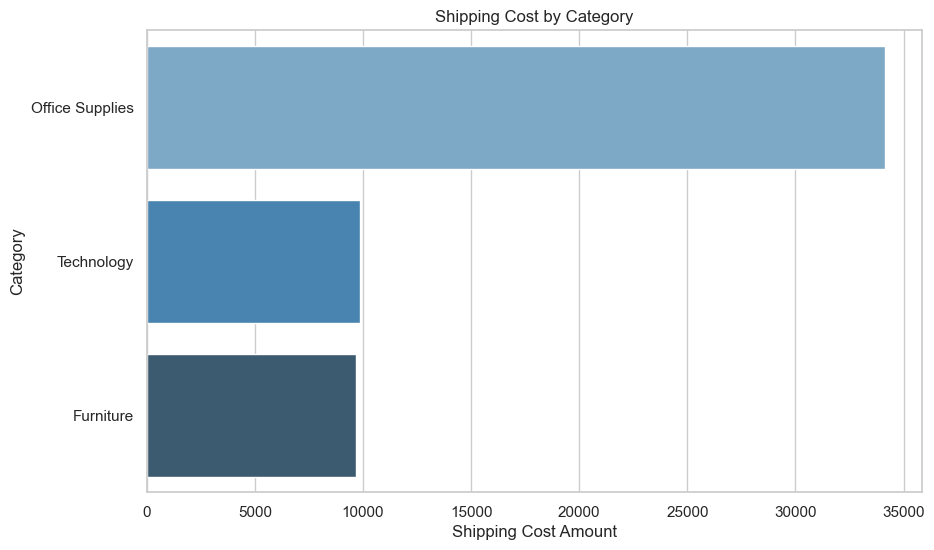

In [73]:
# 2. Plot for Shipping Cost by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_cost_by_category.reset_index(), x='shipping_cost', y='category', palette='Blues_d')
plt.title('Shipping Cost by Category')
plt.xlabel('Shipping Cost Amount')
plt.ylabel('Category')
plt.show()

**The plot breaks down the total shipping cost by category, showing that 'Office Supplies' incurs the highest shipping cost at 34,136.89, followed by 'Technology' with 9,868.03, and 'Furniture' with 9,680.59.**

**This distribution indicates that Office Supplies not only dominate in sales and profit but also carry the highest logistics expenses.**

**The visualization enables a clear comparison of shipping costs across categories, providing insight into how shipping expenses align with each category's demand and volume**

## Correlation Analysis
**Explore correlations among numeric features.**

In [74]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [75]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

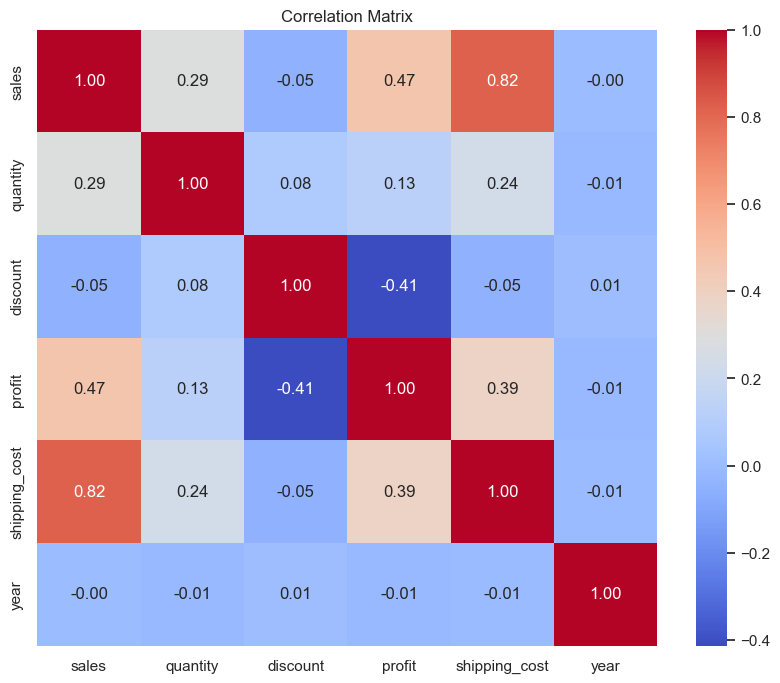

In [76]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**The heatmap visualizes the correlation matrix, providing insights into the relationships between different variables.**

**The color gradient highlights positive correlations in shades of red and negative correlations in shades of blue.**

**The numerical annotations display the correlation coefficients, giving a precise view of how closely the variables are related**

## IN SUMMARY
**The data reveals that 'Office Supplies' is the dominant category in terms of both sales and shipping costs, with a total sales value of 98,590.22 and corresponding shipping costs of 34,136.89.**

**While 'Furniture' and 'Technology' show lower sales figures, their shipping costs remain relatively close to each other, with Furniture slightly higher.**

**Profit margins are strongest in the Office Supplies category, indicating that this segment is the most profitable.**

**The average discount applied is also highest in Furniture, suggesting a strategy to stimulate sales in this category.**

**Overall, the data suggests that while Office Supplies are leading in sales and profitability, careful attention should be given to shipping costs, especially in high-volume categories like Office Supplies, to optimize cost efficiency.**

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------